In this project, we will create tables and charts to analyze greenhouse gas emission data in Brazil. Concluding this course, we will be able to select, filter and group data.

#### Palette colors

In [1]:
# color to be used in charts
AZUL1, AZUL2, AZUL3, AZUL4, AZUL5 = '#03045e', '#0077b6', "#00b4d8",'#90e0ef', '#CDDBF3'
CINZA1, CINZA2, CINZA3, CINZA4, CINZA5 = '#212529', '#495057','#adb5bd', '#dee2e6', '#f8f9fa'
VERMELHO1, LARANJA1, AMARELO1, VERDE1, VERDE2 = '#e76f51', '#f4a261','#e9c46a', '#4c956c', '#2a9d8f'

# Importing database

In [2]:
import pandas as pd

In [3]:
file = '1-SEEG10_GERAL-BR_UF_2022.10.27-FINAL-SITE.xlsx'

In [88]:
dados = pd.read_csv('gas_emissions.csv', dtype='str')
colunas = list(dados.iloc[:,11:].columns)
dados[colunas] = dados[colunas].astype(float)

In [92]:
colunas = list(dados.iloc[:,11:].columns)
dados[colunas] = dados[colunas].astype(float)

In [93]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103312 entries, 0 to 103311
Data columns (total 63 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Nível 1 - Setor             103312 non-null  object 
 1   Nível 2                     103312 non-null  object 
 2   Nível 3                     103253 non-null  object 
 3   Nível 4                     90920 non-null   object 
 4   Nível 5                     100788 non-null  object 
 5   Nível 6                     97691 non-null   object 
 6   Emissão / Remoção / Bunker  103312 non-null  object 
 7   Gás                         103312 non-null  object 
 8   Estado                      97374 non-null   object 
 9   Atividade Econômica         102076 non-null  object 
 10  Produto                     37413 non-null   object 
 11  1970                        103312 non-null  float64
 12  1971                        103312 non-null  float64
 13  1972          

In [4]:
gas_emission = pd.read_excel(file, sheet_name= 'GEE Estados')


c:\Users\63\AppData\Local\Programs\Python\Python311\Lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [79]:
gas_emission.to_csv('gas_emissions.csv', index = False)

In [5]:
gas_emission.head(3)

,Nível 1 - Setor,Nível 2,Nível 3,Nível 4,Nível 5,Nível 6,Emissão / Remoção / Bunker,Gás,Estado,Atividade Econômica,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Processos Industriais,Indústria Química,Produção de ABS,NaN,NaN,NaN,Emissão,COVNM (t),SP,OUTRA_IND,...,897.600,897.600,897.600,897.600,897.600,897.600,897.600,897.600,897.600,897.600
1,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,Emissão,N2O (t),SP,OUTRA_IND,...,130.000,130.000,130.000,130.000,130.000,130.000,130.000,130.000,130.000,130.000
2,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,Emissão,CO (t),SP,OUTRA_IND,...,1380.576,1380.576,1380.576,1380.576,1380.576,1380.576,1380.576,1380.576,1380.576,1380.576


## Data informations

In [6]:
gas_emission.shape

(103312, 63)

In [7]:
gas_emission.columns

Index([           'Nível 1 - Setor',                    'Nível 2',
                          'Nível 3',                    'Nível 4',
                          'Nível 5',                    'Nível 6',
       'Emissão / Remoção / Bunker',                        'Gás',
                           'Estado',        'Atividade Econômica',
                          'Produto',                         1970,
                               1971,                         1972,
                               1973,                         1974,
                               1975,                         1976,
                               1977,                         1978,
                               1979,                         1980,
                               1981,                         1982,
                               1983,                         1984,
                               1985,                         1986,
                               1987,                         1

In [8]:
gas_emission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103312 entries, 0 to 103311
Data columns (total 63 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Nível 1 - Setor             103312 non-null  object 
 1   Nível 2                     103312 non-null  object 
 2   Nível 3                     103253 non-null  object 
 3   Nível 4                     90920 non-null   object 
 4   Nível 5                     100788 non-null  object 
 5   Nível 6                     97691 non-null   object 
 6   Emissão / Remoção / Bunker  103312 non-null  object 
 7   Gás                         103312 non-null  object 
 8   Estado                      97374 non-null   object 
 9   Atividade Econômica         102076 non-null  object 
 10  Produto                     37413 non-null   object 
 11  1970                        103312 non-null  float64
 12  1971                        103312 non-null  float64
 13  1972          

# Exploration

## Data exploration

How the team wants to know data about gas emissions registered in Brazilian national inventary, we will remove every information that won't be useful for us. So, we will remove data from  Emissão / Remoção / Bunker which isn't Emissão.

Besides this, we gonna see if every data in Remoção is negative.

In [9]:
gas_emission['Emissão / Remoção / Bunker'].unique()

array(['Emissão', 'Emissão NCI', 'Remoção NCI', 'Bunker', 'Remoção'],
      dtype=object)

In [10]:
gas_emission.loc[gas_emission['Emissão / Remoção / Bunker'].isin(['Remoção NCI', 'Remoção'])]

,Nível 1 - Setor,Nível 2,Nível 3,Nível 4,Nível 5,Nível 6,Emissão / Remoção / Bunker,Gás,Estado,Atividade Econômica,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
23520,Agropecuária,Solos Manejados,Diretas,Variação dos Estoques de Carbono no Solo,Vegetal,Pastagem Bem Manejada,Remoção NCI,CO2 (t),RO,PEC,...,-1.434540e+07,-1.499358e+07,-1.543196e+07,-1.567070e+07,-1.630063e+07,-1.702215e+07,-1.740074e+07,-1.771914e+07,-1.767632e+07,-1.838895e+07
23521,Agropecuária,Solos Manejados,Diretas,Variação dos Estoques de Carbono no Solo,Vegetal,Pastagem Bem Manejada,Remoção NCI,CO2 (t),AC,PEC,...,-5.382949e+06,-5.524659e+06,-5.632429e+06,-5.765030e+06,-5.867354e+06,-5.942076e+06,-6.022000e+06,-6.002147e+06,-6.035591e+06,-6.459079e+06
23522,Agropecuária,Solos Manejados,Diretas,Variação dos Estoques de Carbono no Solo,Vegetal,Pastagem Bem Manejada,Remoção NCI,CO2 (t),AM,PEC,...,-3.450455e+06,-3.540294e+06,-3.545724e+06,-3.924546e+06,-4.626541e+06,-4.874199e+06,-4.849173e+06,-4.959540e+06,-5.106806e+06,-5.809814e+06
23523,Agropecuária,Solos Manejados,Diretas,Variação dos Estoques de Carbono no Solo,Vegetal,Pastagem Bem Manejada,Remoção NCI,CO2 (t),RR,PEC,...,-1.260166e+06,-1.261895e+06,-1.371664e+06,-1.501452e+06,-1.507705e+06,-1.509919e+06,-1.609826e+06,-1.616980e+06,-1.518397e+06,-1.926000e+06
23524,Agropecuária,Solos Manejados,Diretas,Variação dos Estoques de Carbono no Solo,Vegetal,Pastagem Bem Manejada,Remoção NCI,CO2 (t),PA,PEC,...,-3.429279e+07,-3.317185e+07,-3.281628e+07,-3.350720e+07,-3.557183e+07,-3.755308e+07,-4.134614e+07,-4.229403e+07,-4.275448e+07,-4.443440e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102751,Mudança de Uso da Terra e Floresta,Remoção por Vegetação Secundária,Pantanal,em Área Protegida,Vegetação nativa estável,Vegetação não florestal secundária -- Vegetaçã...,Remoção,CO2e (t) GWP-AR4,MS,AGROPEC,...,-7.513000e+04,-7.911900e+04,-8.695900e+04,-9.201400e+04,-9.149400e+04,-9.630200e+04,-9.202000e+04,-9.762300e+04,-1.015020e+05,-1.008910e+05
102752,Mudança de Uso da Terra e Floresta,Remoção por Vegetação Secundária,Pantanal,em Área Protegida,Vegetação nativa estável,Vegetação não florestal secundária -- Vegetaçã...,Remoção,CO2e (t) GWP-AR5,MT,AGROPEC,...,-9.523000e+03,-9.667000e+03,-1.000300e+04,-1.024200e+04,-1.027200e+04,-1.019100e+04,-1.046900e+04,-1.090400e+04,-1.104100e+04,-1.109500e+04
102753,Mudança de Uso da Terra e Floresta,Remoção por Vegetação Secundária,Pantanal,em Área Protegida,Vegetação nativa estável,Vegetação não florestal secundária -- Vegetaçã...,Remoção,CO2e (t) GWP-AR5,MS,AGROPEC,...,-7.513000e+04,-7.911900e+04,-8.695900e+04,-9.201400e+04,-9.149400e+04,-9.630200e+04,-9.202000e+04,-9.762300e+04,-1.015020e+05,-1.008910e+05
102754,Mudança de Uso da Terra e Floresta,Remoção por Vegetação Secundária,Pantanal,em Área Protegida,Vegetação nativa estável,Vegetação não florestal secundária -- Vegetaçã...,Remoção,CO2e (t) GWP-AR6,MT,AGROPEC,...,-9.523000e+03,-9.667000e+03,-1.000300e+04,-1.024200e+04,-1.027200e+04,-1.019100e+04,-1.046900e+04,-1.090400e+04,-1.104100e+04,-1.109500e+04


In [11]:
gas_emission.loc[gas_emission['Emissão / Remoção / Bunker'].isin(['Remoção']), 1973:].max()

1973    0.0
1974    0.0
1975    0.0
1976    0.0
1977    0.0
1978    0.0
1979    0.0
1980    0.0
1981    0.0
1982    0.0
1983    0.0
1984    0.0
1985    0.0
1986    0.0
1987    0.0
1988    0.0
1989    0.0
1990    0.0
1991    0.0
1992    0.0
1993    0.0
1994    0.0
1995    0.0
1996    0.0
1997    0.0
1998    0.0
1999    0.0
2000    0.0
2001    0.0
2002    0.0
2003    0.0
2004    0.0
2005    0.0
2006    0.0
2007    0.0
2008    0.0
2009    0.0
2010    0.0
2011    0.0
2012    0.0
2013    0.0
2014    0.0
2015    0.0
2016    0.0
2017    0.0
2018    0.0
2019    0.0
2020    0.0
2021    0.0
dtype: float64

In [12]:
gas_emission.loc[gas_emission['Emissão / Remoção / Bunker'] == 'Bunker', 'Estado']

67365    NaN
67366    NaN
67367    NaN
67368    NaN
67369    NaN
67370    NaN
67371    NaN
67372    NaN
67373    NaN
67374    NaN
67375    NaN
67376    NaN
67377    NaN
67378    NaN
68503    NaN
68504    NaN
68505    NaN
68506    NaN
68507    NaN
68508    NaN
68509    NaN
68510    NaN
68511    NaN
68512    NaN
68513    NaN
68514    NaN
68515    NaN
68516    NaN
68909    NaN
68910    NaN
68911    NaN
68912    NaN
68913    NaN
68914    NaN
68915    NaN
68916    NaN
68917    NaN
68918    NaN
68919    NaN
68920    NaN
68921    NaN
68922    NaN
Name: Estado, dtype: object

Observing these informations, we can remove the lines different from Emissão.

## Removing data

In [13]:
df_emission = gas_emission[gas_emission['Emissão / Remoção / Bunker'] == 'Emissão'].copy()
df_emission.drop('Emissão / Remoção / Bunker', axis = 1, inplace = True)

In [14]:
df_emission.reset_index(drop = True, inplace = True)

In [15]:
df_emission.head()

,Nível 1 - Setor,Nível 2,Nível 3,Nível 4,Nível 5,Nível 6,Gás,Estado,Atividade Econômica,Produto,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Processos Industriais,Indústria Química,Produção de ABS,NaN,NaN,NaN,COVNM (t),SP,OUTRA_IND,NaN,...,897.600,897.600,897.600,897.600,897.600,897.600,897.600,897.600,897.600,897.600
1,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,N2O (t),SP,OUTRA_IND,NaN,...,130.000,130.000,130.000,130.000,130.000,130.000,130.000,130.000,130.000,130.000
2,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,CO (t),SP,OUTRA_IND,NaN,...,1380.576,1380.576,1380.576,1380.576,1380.576,1380.576,1380.576,1380.576,1380.576,1380.576
3,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,NOx (t),SP,OUTRA_IND,NaN,...,431.430,431.430,431.430,431.430,431.430,431.430,431.430,431.430,431.430,431.430
4,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,CO2e (t) GWP-AR2,SP,OUTRA_IND,NaN,...,40300.000,40300.000,40300.000,40300.000,40300.000,40300.000,40300.000,40300.000,40300.000,40300.000


## Challenges 01 

### 01. Find unique values to columns "Nível 1 - Setor" e "Estado" to identify economic activity and if every Brazilian State are in dataframe.

In [16]:
df_emission['Nível 1 - Setor'].unique()

array(['Processos Industriais', 'Agropecuária', 'Energia', 'Resíduos ',
       'Mudança de Uso da Terra e Floresta'], dtype=object)

In [17]:
len(df_emission['Estado'].unique())

28

### 02. Get a dataframe from Brazil south region.

In [18]:
south_states = df_emission[df_emission['Estado'].isin(['PR','SC','RS'])]
south_states.head()

,Nível 1 - Setor,Nível 2,Nível 3,Nível 4,Nível 5,Nível 6,Gás,Estado,Atividade Econômica,Produto,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
35,Processos Industriais,Indústria Química,Produção de Amônia,NaN,NaN,NaN,CO2 (t),PR,OUTRA_IND,NaN,...,4.562042e+05,4.682616e+05,5.151689e+05,5.151689e+05,5.151689e+05,5.151689e+05,5.151689e+05,5.151689e+05,5.151689e+05,5.151689e+05
36,Processos Industriais,Indústria Química,Produção de Amônia,NaN,NaN,NaN,CO2e (t) GWP-AR2,PR,OUTRA_IND,NaN,...,4.562042e+05,4.682616e+05,5.151689e+05,5.151689e+05,5.151689e+05,5.151689e+05,5.151689e+05,5.151689e+05,5.151689e+05,5.151689e+05
37,Processos Industriais,Indústria Química,Produção de Amônia,NaN,NaN,NaN,CO2e (t) GTP-AR2,PR,OUTRA_IND,NaN,...,4.562042e+05,4.682616e+05,5.151689e+05,5.151689e+05,5.151689e+05,5.151689e+05,5.151689e+05,5.151689e+05,5.151689e+05,5.151689e+05
110,Processos Industriais,Produtos Minerais,Produção de Cimento,NaN,NaN,NaN,CO2 (t),PR,CIM,NaN,...,2.012596e+06,2.212002e+06,2.241143e+06,2.176752e+06,2.279061e+06,2.115372e+06,2.173266e+06,2.230656e+06,2.488650e+06,2.845457e+06
111,Processos Industriais,Produtos Minerais,Produção de Cimento,NaN,NaN,NaN,CO2 (t),SC,CIM,NaN,...,7.126368e+05,6.421719e+05,8.163383e+05,6.769844e+05,5.272686e+05,5.143665e+05,5.130451e+05,5.451073e+05,6.144431e+05,7.179804e+05


In [19]:
south_states.Estado.unique()

array(['PR', 'SC', 'RS'], dtype=object)

### 03. Get dataframe with 'Mudança de Uso da Terra e Floresta' from Amazonas.

In [20]:
filter = (df_emission['Nível 1 - Setor'] == "Mudança de Uso da Terra e Floresta") & (df_emission['Estado'] == 'AM')

In [21]:
df_emission[filter]

,Nível 1 - Setor,Nível 2,Nível 3,Nível 4,Nível 5,Nível 6,Gás,Estado,Atividade Econômica,Produto,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
79762,Mudança de Uso da Terra e Floresta,Alterações de Uso da Terra,Amazônia,fora de Área Protegida,Desmatamento,Floresta primária -- Área sem vegetação,CO2 (t),AM,AGROPEC,NaN,...,8.511800e+04,9.763700e+04,8.761900e+04,1.218150e+05,1.137590e+05,5.299800e+04,6.117000e+04,48264.0,14381.0,31867.0
79771,Mudança de Uso da Terra e Floresta,Alterações de Uso da Terra,Amazônia,fora de Área Protegida,Desmatamento,Floresta primária -- Área sem vegetação,CO2e (t) GTP-AR2,AM,AGROPEC,NaN,...,8.511800e+04,9.763700e+04,8.761900e+04,1.218150e+05,1.137590e+05,5.299800e+04,6.117000e+04,48264.0,14381.0,31867.0
79780,Mudança de Uso da Terra e Floresta,Alterações de Uso da Terra,Amazônia,fora de Área Protegida,Desmatamento,Floresta primária -- Área sem vegetação,CO2e (t) GTP-AR4,AM,AGROPEC,NaN,...,8.511800e+04,9.763700e+04,8.761900e+04,1.218150e+05,1.137590e+05,5.299800e+04,6.117000e+04,48264.0,14381.0,31867.0
79789,Mudança de Uso da Terra e Floresta,Alterações de Uso da Terra,Amazônia,fora de Área Protegida,Desmatamento,Floresta primária -- Área sem vegetação,CO2e (t) GTP-AR5,AM,AGROPEC,NaN,...,8.511800e+04,9.763700e+04,8.761900e+04,1.218150e+05,1.137590e+05,5.299800e+04,6.117000e+04,48264.0,14381.0,31867.0
79798,Mudança de Uso da Terra e Floresta,Alterações de Uso da Terra,Amazônia,fora de Área Protegida,Desmatamento,Floresta primária -- Área sem vegetação,CO2e (t) GTP-AR6,AM,AGROPEC,NaN,...,8.511800e+04,9.763700e+04,8.761900e+04,1.218150e+05,1.137590e+05,5.299800e+04,6.117000e+04,48264.0,14381.0,31867.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94305,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Amazônia,NaN,Desmatamento,NaN,CO2e (t) GWP-AR2,AM,AGROPEC,NaN,...,2.239997e+06,3.186571e+06,2.973253e+06,4.796274e+06,7.396711e+06,4.362453e+06,4.434835e+06,7074966.0,8746520.0,8429758.0
94314,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Amazônia,NaN,Desmatamento,NaN,CO2e (t) GWP-AR4,AM,AGROPEC,NaN,...,2.505953e+06,3.565317e+06,3.330733e+06,5.368844e+06,8.276064e+06,4.888099e+06,4.967871e+06,7929733.0,9799770.0,9408067.0
94323,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Amazônia,NaN,Desmatamento,NaN,CO2e (t) GWP-AR5,AM,AGROPEC,NaN,...,2.651128e+06,3.772286e+06,3.528292e+06,5.683071e+06,8.756712e+06,5.179207e+06,5.262358e+06,8404321.0,10382705.0,9929881.0
94332,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Amazônia,NaN,Desmatamento,NaN,CO2e (t) GWP-AR6,AM,AGROPEC,NaN,...,2.661898e+06,3.787545e+06,3.541992e+06,5.705721e+06,8.792123e+06,5.199159e+06,5.282817e+06,8436366.0,10422789.0,9973416.0


### 04. Find the maximum emission value to year 2021 for 'Agropecuaria" in Para.

In [22]:
filter = (df_emission['Nível 1 - Setor'] == 'Agropecuária') & (df_emission['Estado'] == 'PA')

In [23]:
df_emission[filter].head()

,Nível 1 - Setor,Nível 2,Nível 3,Nível 4,Nível 5,Nível 6,Gás,Estado,Atividade Econômica,Produto,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
1150,Agropecuária,Cultivo de Arroz,Diretas,Outros,Vegetal,Arroz,CH4 (t),PA,AGR,ALIM_BEBIDAS,...,709.650,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1177,Agropecuária,Cultivo de Arroz,Diretas,Outros,Vegetal,Arroz,CO2e (t) GTP-AR2,PA,AGR,ALIM_BEBIDAS,...,3548.250,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1204,Agropecuária,Cultivo de Arroz,Diretas,Outros,Vegetal,Arroz,CO2e (t) GTP-AR4,PA,AGR,ALIM_BEBIDAS,...,3548.250,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1231,Agropecuária,Cultivo de Arroz,Diretas,Outros,Vegetal,Arroz,CO2e (t) GTP-AR5,PA,AGR,ALIM_BEBIDAS,...,2838.600,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1258,Agropecuária,Cultivo de Arroz,Diretas,Outros,Vegetal,Arroz,CO2e (t) GTP-AR6,PA,AGR,ALIM_BEBIDAS,...,3335.355,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
df_emission.loc[filter, 2021].max()

36856969.7986

## Transforming the dataframe

### Melting Df

We will switch the configuration of our dataframe and melt the years columns in to a single column named 'Ano' and a second column with their respective value. To do this, we will separate our columns in informative columns which will be the ones that we want keep, and values columns which will be melted.

In [25]:
df_emission.head(3)

,Nível 1 - Setor,Nível 2,Nível 3,Nível 4,Nível 5,Nível 6,Gás,Estado,Atividade Econômica,Produto,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Processos Industriais,Indústria Química,Produção de ABS,NaN,NaN,NaN,COVNM (t),SP,OUTRA_IND,NaN,...,897.600,897.600,897.600,897.600,897.600,897.600,897.600,897.600,897.600,897.600
1,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,N2O (t),SP,OUTRA_IND,NaN,...,130.000,130.000,130.000,130.000,130.000,130.000,130.000,130.000,130.000,130.000
2,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,CO (t),SP,OUTRA_IND,NaN,...,1380.576,1380.576,1380.576,1380.576,1380.576,1380.576,1380.576,1380.576,1380.576,1380.576


In [26]:
df_emission.columns

Index([    'Nível 1 - Setor',             'Nível 2',             'Nível 3',
                   'Nível 4',             'Nível 5',             'Nível 6',
                       'Gás',              'Estado', 'Atividade Econômica',
                   'Produto',                  1970,                  1971,
                        1972,                  1973,                  1974,
                        1975,                  1976,                  1977,
                        1978,                  1979,                  1980,
                        1981,                  1982,                  1983,
                        1984,                  1985,                  1986,
                        1987,                  1988,                  1989,
                        1990,                  1991,                  1992,
                        1993,                  1994,                  1995,
                        1996,                  1997,                  1998,
            

In [27]:
info_columns = list(df_emission.loc[:, :'Produto'].columns)

In [28]:
emission_columns = list(df_emission.loc[:, 1970:2021].columns)

In [29]:
yearly_emission = df_emission.melt(id_vars = info_columns, value_vars = emission_columns, var_name = 'Ano', value_name = 'Emissão')

In [30]:
yearly_emission.head()

,Nível 1 - Setor,Nível 2,Nível 3,Nível 4,Nível 5,Nível 6,Gás,Estado,Atividade Econômica,Produto,Ano,Emissão
0,Processos Industriais,Indústria Química,Produção de ABS,NaN,NaN,NaN,COVNM (t),SP,OUTRA_IND,NaN,1970,0.0
1,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,N2O (t),SP,OUTRA_IND,NaN,1970,6210.0
2,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,CO (t),SP,OUTRA_IND,NaN,1970,368.0
3,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,NOx (t),SP,OUTRA_IND,NaN,1970,115.0
4,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,CO2e (t) GWP-AR2,SP,OUTRA_IND,NaN,1970,1925100.0


### Grouping by Gás

Now, after melting and transform the dataframe, it's possible to group the data according to the column 'Gás', turning possible to see the emission from each Gás.

In [31]:
yearly_emission.groupby('Gás').groups

{'C2F6 (t)': [410, 411, 412, 425, 426, 427, 95158, 95159, 95160, 95173, 95174, 95175, 189906, 189907, 189908, 189921, 189922, 189923, 284654, 284655, 284656, 284669, 284670, 284671, 379402, 379403, 379404, 379417, 379418, 379419, 474150, 474151, 474152, 474165, 474166, 474167, 568898, 568899, 568900, 568913, 568914, 568915, 663646, 663647, 663648, 663661, 663662, 663663, 758394, 758395, 758396, 758409, 758410, 758411, 853142, 853143, 853144, 853157, 853158, 853159, 947890, 947891, 947892, 947905, 947906, 947907, 1042638, 1042639, 1042640, 1042653, 1042654, 1042655, 1137386, 1137387, 1137388, 1137401, 1137402, 1137403, 1232134, 1232135, 1232136, 1232149, 1232150, 1232151, 1326882, 1326883, 1326884, 1326897, 1326898, 1326899, 1421630, 1421631, 1421632, 1421645, 1421646, 1421647, 1516378, 1516379, 1516380, 1516393, ...], 'CF4 (t)': [407, 408, 409, 422, 423, 424, 95155, 95156, 95157, 95170, 95171, 95172, 189903, 189904, 189905, 189918, 189919, 189920, 284651, 284652, 284653, 284666, 284667

In [32]:
emission_by_gas = yearly_emission.groupby('Gás').sum(numeric_only = True).sort_values('Emissão', ascending = False)

In [33]:
emission_by_gas

,Emissão
Gás,
CO2e (t) GWP-AR5,8.181375e+10
CO2e (t) GWP-AR6,8.132316e+10
CO2e (t) GWP-AR4,8.015921e+10
CO2e (t) GWP-AR2,7.720596e+10
CO2e (t) GTP-AR2,6.344612e+10
CO2e (t) GTP-AR4,6.344612e+10
CO2e (t) GTP-AR6,6.247859e+10
CO2e (t) GTP-AR5,6.182200e+10
CO2 (t),5.324636e+10


Now, we will look for how much the CO2 corresponds from the emissions total sum.

In [34]:
co2_emission = float((emission_by_gas.iloc[0:9].sum()/emission_by_gas.sum()).iloc[0] * 100)
print(f'CO2 emissions corresponds in {co2_emission:.2f}% from the total.')

CO2 emissions corresponds in 99.74% from the total.


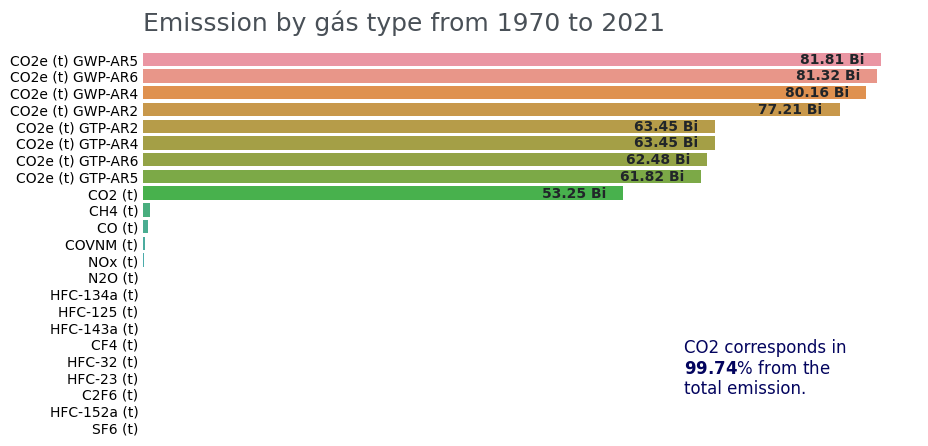

In [35]:
import seaborn as sns 
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize = (10,5))
sns.barplot(data = emission_by_gas, y = emission_by_gas.index, x = 'Emissão' )

ax.set_title('Emisssion by gás type from 1970 to 2021', loc = 'left', fontsize = 18, color= CINZA2, pad = 15)
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_xticklabels([])
ax.tick_params(axis='both', which='both', length = 0)
sns.despine(left=True, bottom = True)

for i, v in enumerate(emission_by_gas['Emissão']):
    if v > 50e9:
        value = f'{v/1e9:.2f} Bi'
        offset = 9e9
        ax.text(v - offset, i, value, color = CINZA1, fontweight = 'bold', fontsize = 10, ha = 'left', va = 'center')

# Drawing a conclusion in the graph
ax.text(60e9, 20, 'CO2 corresponds in\n'
        f'$\\bf{co2_emission:.2f}$% from the\n'
        'total emission.', fontsize=12,
color=AZUL1)
# ax.text(3.35, 5.5e5,
# 'das vendas nas lojas\n'
# 'estão concentradas nas regiões\n'
# '$\\bf{Sudeste}$, $\\bf{Nordeste}$ e\n''$\\bf{Centro-Oeste}$ em 2019.',
# fontsize=14,
# linespacing=1.45,
# color=AZUL1)
plt.show()

## Challenge 02 

### 01 Group data based in column "Nível 1 - Setor" to visualize the dictionary containing the group keys and the index list from each group.

In [36]:
yearly_emission.groupby('Nível 1 - Setor').groups

{'Agropecuária': [1137, 1138, 1139, 1140, 1141, 1142, 1143, 1144, 1145, 1146, 1147, 1148, 1149, 1150, 1151, 1152, 1153, 1154, 1155, 1156, 1157, 1158, 1159, 1160, 1161, 1162, 1163, 1164, 1165, 1166, 1167, 1168, 1169, 1170, 1171, 1172, 1173, 1174, 1175, 1176, 1177, 1178, 1179, 1180, 1181, 1182, 1183, 1184, 1185, 1186, 1187, 1188, 1189, 1190, 1191, 1192, 1193, 1194, 1195, 1196, 1197, 1198, 1199, 1200, 1201, 1202, 1203, 1204, 1205, 1206, 1207, 1208, 1209, 1210, 1211, 1212, 1213, 1214, 1215, 1216, 1217, 1218, 1219, 1220, 1221, 1222, 1223, 1224, 1225, 1226, 1227, 1228, 1229, 1230, 1231, 1232, 1233, 1234, 1235, 1236, ...], 'Energia': [23277, 23278, 23279, 23280, 23281, 23282, 23283, 23284, 23285, 23286, 23287, 23288, 23289, 23290, 23291, 23292, 23293, 23294, 23295, 23296, 23297, 23298, 23299, 23300, 23301, 23302, 23303, 23304, 23305, 23306, 23307, 23308, 23309, 23310, 23311, 23312, 23313, 23314, 23315, 23316, 23317, 23318, 23319, 23320, 23321, 23322, 23323, 23324, 23325, 23326, 23327, 23328, 

In [37]:
yearly_emission.groupby('Nível 1 - Setor').groups.keys()

dict_keys(['Agropecuária', 'Energia', 'Mudança de Uso da Terra e Floresta', 'Processos Industriais', 'Resíduos '])

### 02 Group data based in column "Nível 1 - Setor" and localize the group data "Agropecuária"

In [38]:
yearly_emission.groupby('Nível 1 - Setor').get_group("Agropecuária")

,Nível 1 - Setor,Nível 2,Nível 3,Nível 4,Nível 5,Nível 6,Gás,Estado,Atividade Econômica,Produto,Ano,Emissão
1137,Agropecuária,Cultivo de Arroz,Diretas,Outros,Vegetal,Arroz,CH4 (t),AC,AGR,ALIM_BEBIDAS,1970,0.000000
1138,Agropecuária,Cultivo de Arroz,Diretas,Outros,Vegetal,Arroz,CH4 (t),AL,AGR,ALIM_BEBIDAS,1970,2050.445805
1139,Agropecuária,Cultivo de Arroz,Diretas,Outros,Vegetal,Arroz,CH4 (t),AM,AGR,ALIM_BEBIDAS,1970,0.000000
1140,Agropecuária,Cultivo de Arroz,Diretas,Outros,Vegetal,Arroz,CH4 (t),AP,AGR,ALIM_BEBIDAS,1970,0.000000
1141,Agropecuária,Cultivo de Arroz,Diretas,Outros,Vegetal,Arroz,CH4 (t),BA,AGR,ALIM_BEBIDAS,1970,466.934705
...,...,...,...,...,...,...,...,...,...,...,...,...
4855420,Agropecuária,Solos Manejados,Indiretas,Mineralização de N associado a perda de C no solo,Outros,Solos,N2O (t),RS,AGR,ALIM_BEBIDAS,2021,929.545042
4855421,Agropecuária,Solos Manejados,Indiretas,Mineralização de N associado a perda de C no solo,Outros,Solos,N2O (t),SC,AGR,ALIM_BEBIDAS,2021,295.813919
4855422,Agropecuária,Solos Manejados,Indiretas,Mineralização de N associado a perda de C no solo,Outros,Solos,N2O (t),SE,AGR,ALIM_BEBIDAS,2021,32.734589
4855423,Agropecuária,Solos Manejados,Indiretas,Mineralização de N associado a perda de C no solo,Outros,Solos,N2O (t),SP,AGR,ALIM_BEBIDAS,2021,653.155812


### 03 Group data based in column "Nível 1 - Setor" to identify the emissions mean in each economic activity in year 2021

In [39]:
activity_emissions_2021 = yearly_emission.loc[yearly_emission['Ano']==2021].groupby('Nível 1 - Setor').mean().sort_values('Emissão', ascending=False)
activity_emissions_2021

C:\Users\63\AppData\Local\Temp\ipykernel_16124\666614843.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  activity_emissions_2021 = yearly_emission.loc[yearly_emission['Ano']==2021].groupby('Nível 1 - Setor').mean().sort_values('Emissão', ascending=False)


,Emissão
Nível 1 - Setor,
Processos Industriais,787101.255789
Mudança de Uso da Terra e Floresta,690085.511209
Agropecuária,149793.768835
Resíduos,106106.723386
Energia,72928.637234


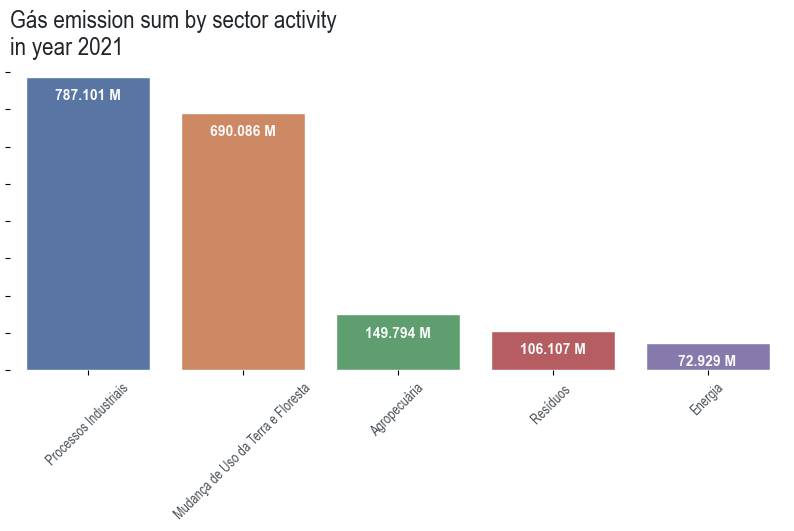

In [40]:

import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(10,4))
sns.set_theme(style='white')

ax = sns.barplot(activity_emissions_2021, x=activity_emissions_2021.index, y= 'Emissão')

ax.set_title('Gás emission sum by sector activity\nin year 2021', loc='left', fontsize=18, color=CINZA1)
ax.set_xlabel('')
ax.set_ylabel('')
ax.xaxis.set_tick_params(labelsize=10, labelcolor= CINZA2, rotation = 45)
sns.despine(left=True, bottom=True)
# Escrevendo os valores de cada barra no gráfico
ax.set_yticklabels([])


for i, v in enumerate(activity_emissions_2021['Emissão']):
    qtd = f'{v:,.0f} M'.replace(',','.')
    offset = 5e4
    ax.text(i, v - offset, (qtd), color = CINZA5, fontsize=10,
    ha='center', va='center', fontweight = 'bold')

fig = ax.get_figure()

### 04 Group data based in column "Nível 1 - Setor" to identify the gas emissions sum in each economic activity. Sort values from the highest to lowest.

In [41]:
yearly_emission.groupby('Nível 1 - Setor').sum().sort_values('Emissão', ascending=False)

C:\Users\63\AppData\Local\Temp\ipykernel_16124\2821135717.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  yearly_emission.groupby('Nível 1 - Setor').sum().sort_values('Emissão', ascending=False)


,Emissão
Nível 1 - Setor,
Mudança de Uso da Terra e Floresta,3.524898e+11
Energia,1.205314e+11
Agropecuária,1.147284e+11
Processos Industriais,2.849965e+10
Resíduos,1.034465e+10


## Gas emission by sector

To this section, we want to answer two questions:
1. Which economic sector is more poluent by gás type;
2. Which gas is more poluent in each sector.

### 1. Which economic sector is more poluent;


In [42]:
yearly_emission.head(3)

,Nível 1 - Setor,Nível 2,Nível 3,Nível 4,Nível 5,Nível 6,Gás,Estado,Atividade Econômica,Produto,Ano,Emissão
0,Processos Industriais,Indústria Química,Produção de ABS,NaN,NaN,NaN,COVNM (t),SP,OUTRA_IND,NaN,1970,0.0
1,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,N2O (t),SP,OUTRA_IND,NaN,1970,6210.0
2,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,CO (t),SP,OUTRA_IND,NaN,1970,368.0


In [43]:
gas_by_sector = yearly_emission.groupby(['Nível 1 - Setor', 'Gás']).sum()

C:\Users\63\AppData\Local\Temp\ipykernel_16124\430875573.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  gas_by_sector = yearly_emission.groupby(['Nível 1 - Setor', 'Gás']).sum()


In [44]:
gas_by_sector

Emissão
Nível 1 - Setor Gás                           
Agropecuária    CH4 (t)           5.928481e+08
                CO (t)            7.132479e+07
                CO2 (t)           5.411750e+08
                CO2e (t) GTP-AR2  8.297112e+09
                CO2e (t) GTP-AR4  8.297112e+09
...                                        ...
Resíduos        CO2e (t) GWP-AR2  1.769016e+09
                CO2e (t) GWP-AR4  2.081997e+09
                CO2e (t) GWP-AR5  2.310099e+09
                CO2e (t) GWP-AR6  2.233335e+09
                N2O (t)           2.764127e+05

[72 rows x 1 columns]

In [45]:
gas_by_sector.groupby(level=0).sum().sort_values('Emissão', ascending=False)

,Emissão
Nível 1 - Setor,
Mudança de Uso da Terra e Floresta,3.524898e+11
Energia,1.205314e+11
Agropecuária,1.147284e+11
Processos Industriais,2.849965e+10
Resíduos,1.034465e+10


In [46]:
gas_by_sector.groupby(level = 0).idxmax()

,Emissão
Nível 1 - Setor,
Agropecuária,"(Agropecuária, CO2e (t) GWP-AR5)"
Energia,"(Energia, CO2e (t) GWP-AR6)"
Mudança de Uso da Terra e Floresta,"(Mudança de Uso da Terra e Floresta, CO2e (t) ..."
Processos Industriais,"(Processos Industriais, CO2e (t) GWP-AR6)"
Resíduos,"(Resíduos , CO2e (t) GWP-AR5)"


### 2. Which gas is more poluent in each sector?

In [47]:
gas_by_sector.groupby(level = 1).max().sort_values('Emissão', ascending=False)
valores_max = gas_by_sector.groupby(level = 1).max().values

tabela_sumarizada = gas_by_sector.groupby(level = 1).idxmax()
tabela_sumarizada.insert(1, 'Quantidade de emissão',valores_max)
tabela_sumarizada


,Emissão,Quantidade de emissão
Gás,,
C2F6 (t),"(Processos Industriais, C2F6 (t))",5.765018e+02
CF4 (t),"(Processos Industriais, CF4 (t))",7.135481e+03
CH4 (t),"(Agropecuária, CH4 (t))",5.928481e+08
CO (t),"(Energia, CO (t))",3.959769e+08
CO2 (t),"(Mudança de Uso da Terra e Floresta, CO2 (t))",3.733930e+10
CO2e (t) GTP-AR2,"(Mudança de Uso da Terra e Floresta, CO2e (t) ...",3.850044e+10
CO2e (t) GTP-AR4,"(Mudança de Uso da Terra e Floresta, CO2e (t) ...",3.850044e+10
CO2e (t) GTP-AR5,"(Mudança de Uso da Terra e Floresta, CO2e (t) ...",3.831675e+10
CO2e (t) GTP-AR6,"(Mudança de Uso da Terra e Floresta, CO2e (t) ...",3.843359e+10


### 3. Verifying the gas emission variation by year

In [48]:
yearly_emission.head(3)

,Nível 1 - Setor,Nível 2,Nível 3,Nível 4,Nível 5,Nível 6,Gás,Estado,Atividade Econômica,Produto,Ano,Emissão
0,Processos Industriais,Indústria Química,Produção de ABS,NaN,NaN,NaN,COVNM (t),SP,OUTRA_IND,NaN,1970,0.0
1,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,N2O (t),SP,OUTRA_IND,NaN,1970,6210.0
2,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,CO (t),SP,OUTRA_IND,NaN,1970,368.0


In [49]:
yearly_emission_mean = yearly_emission.groupby(['Ano', 'Gás'])[['Emissão']].mean()
yearly_emission_mean

Emissão
Ano  Gás                     
1970 C2F6 (t)        0.232610
     CF4 (t)         3.557421
     CH4 (t)      1471.024024
     CO (t)       2155.556658
     CO2 (t)     19244.913199
...                       ...
2021 HFC-23 (t)      0.000000
     HFC-32 (t)    261.100000
     N2O (t)       119.295311
     NOx (t)       679.395431
     SF6 (t)         5.240000

[1196 rows x 1 columns]

In [50]:
yearly_emission_mean = yearly_emission_mean.pivot_table(index = 'Ano', columns= 'Gás', values = 'Emissão')
yearly_emission_mean.head(5)

Gás,C2F6 (t),CF4 (t),CH4 (t),CO (t),CO2 (t),CO2e (t) GTP-AR2,CO2e (t) GTP-AR4,CO2e (t) GTP-AR5,CO2e (t) GTP-AR6,CO2e (t) GWP-AR2,...,COVNM (t),HFC-125 (t),HFC-134a (t),HFC-143a (t),HFC-152a (t),HFC-23 (t),HFC-32 (t),N2O (t),NOx (t),SF6 (t)
Ano,,,,,,,,,,,,,,,,,,,,,
1970,0.232610,3.557421,1471.024024,2155.556658,19244.913199,20821.379814,20821.379814,19162.726020,19775.283385,35396.183865,...,742.074863,0.0,0.0,0.0,0.0,0.0,0.0,31.632709,154.072797,0.0
1971,0.334611,5.117360,1525.506914,2259.625805,21598.587743,22466.288595,22466.288595,20748.481445,21386.175802,37570.982886,...,730.119047,0.0,0.0,0.0,0.0,0.0,0.0,32.609237,170.550178,0.0
1972,0.404684,6.189025,1584.719568,2418.944795,23664.445521,24100.305265,24100.305265,22303.224240,22966.797327,39800.768350,...,774.278817,0.0,0.0,0.0,0.0,0.0,0.0,34.311864,188.856161,0.0
1973,0.463147,7.083136,1642.612439,2596.053853,27726.668829,26683.827206,26683.827206,24827.077028,25516.409611,42947.755490,...,796.866394,0.0,0.0,0.0,0.0,0.0,0.0,35.278689,217.320480,0.0
1974,0.471026,7.203619,1704.614365,2681.450599,30155.918952,28539.318732,28539.318732,26600.481407,27321.124852,45431.240064,...,1024.694923,0.0,0.0,0.0,0.0,0.0,0.0,37.098183,247.521415,0.0


array([<Axes: xlabel='Ano'>, <Axes: xlabel='Ano'>, <Axes: xlabel='Ano'>,
       <Axes: xlabel='Ano'>, <Axes: xlabel='Ano'>, <Axes: xlabel='Ano'>,
       <Axes: xlabel='Ano'>, <Axes: xlabel='Ano'>, <Axes: xlabel='Ano'>,
       <Axes: xlabel='Ano'>, <Axes: xlabel='Ano'>, <Axes: xlabel='Ano'>,
       <Axes: xlabel='Ano'>, <Axes: xlabel='Ano'>, <Axes: xlabel='Ano'>,
       <Axes: xlabel='Ano'>, <Axes: xlabel='Ano'>, <Axes: xlabel='Ano'>,
       <Axes: xlabel='Ano'>, <Axes: xlabel='Ano'>, <Axes: xlabel='Ano'>,
       <Axes: xlabel='Ano'>, <Axes: xlabel='Ano'>], dtype=object)

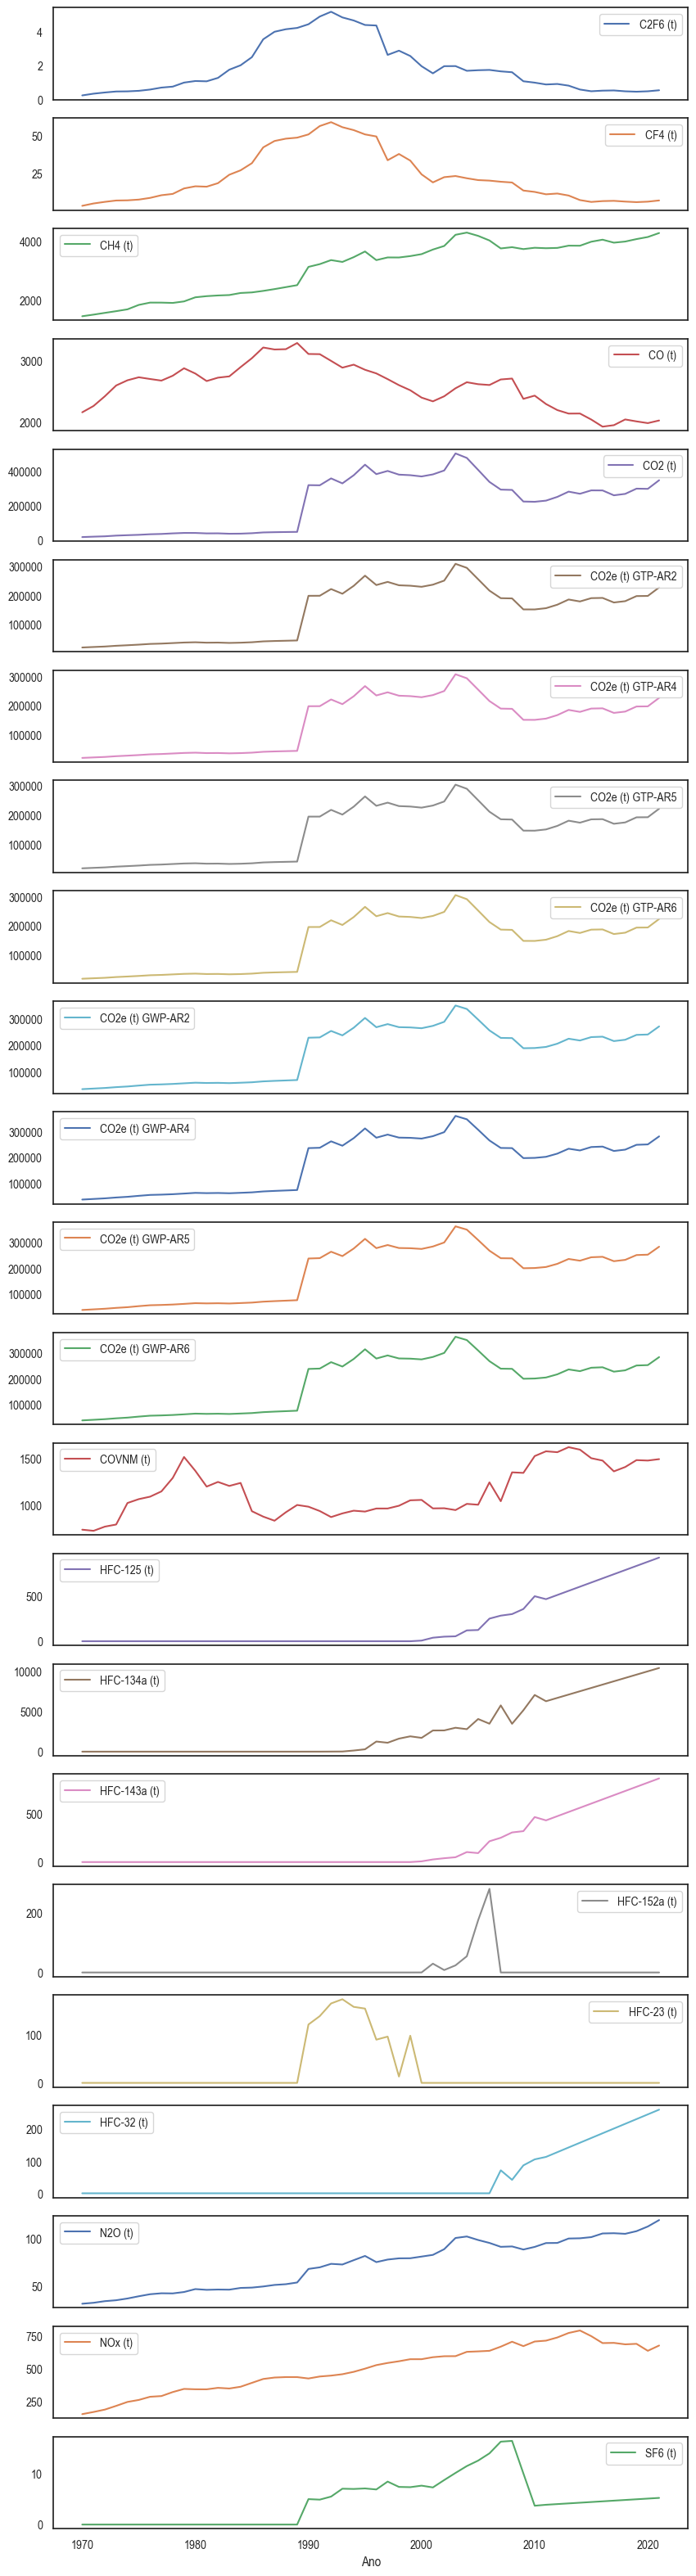

In [51]:
yearly_emission_mean.plot(subplots = True, figsize= (10,40))

## Challenge 03

The supervision team wants to know the emissions mean to each economic sector from column "Nível 1 - Setor". How a challenge, build a pivot table and a graph visualization containing this infos, utilizing just the pivot_table method without using groupby.

In [52]:
yearly_emission.head()

,Nível 1 - Setor,Nível 2,Nível 3,Nível 4,Nível 5,Nível 6,Gás,Estado,Atividade Econômica,Produto,Ano,Emissão
0,Processos Industriais,Indústria Química,Produção de ABS,NaN,NaN,NaN,COVNM (t),SP,OUTRA_IND,NaN,1970,0.0
1,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,N2O (t),SP,OUTRA_IND,NaN,1970,6210.0
2,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,CO (t),SP,OUTRA_IND,NaN,1970,368.0
3,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,NOx (t),SP,OUTRA_IND,NaN,1970,115.0
4,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,CO2e (t) GWP-AR2,SP,OUTRA_IND,NaN,1970,1925100.0


In [53]:
yearly_sector_emission = yearly_emission.pivot_table(index = 'Ano', columns = 'Nível 1 - Setor', aggfunc='mean', values = 'Emissão')
yearly_sector_emission.head()

Nível 1 - Setor,Agropecuária,Energia,Mudança de Uso da Terra e Floresta,Processos Industriais,Resíduos
Ano,,,,,
1970,49292.425313,15939.703116,0.0,106549.168676,11684.883558
1971,51199.559433,17698.989894,0.0,111532.507753,12676.706849
1972,53508.935498,19092.876761,0.0,125701.525455,13709.697850
1973,55494.006224,22062.085929,0.0,137657.110402,14715.248028
1974,57896.513900,23810.659474,0.0,149941.779638,15710.616150


array([<Axes: xlabel='Ano'>, <Axes: xlabel='Ano'>, <Axes: xlabel='Ano'>,
       <Axes: xlabel='Ano'>, <Axes: xlabel='Ano'>], dtype=object)

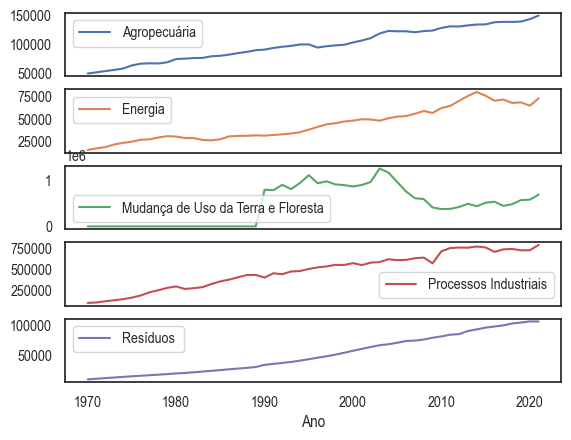

In [54]:
yearly_sector_emission.plot(kind = 'line', subplots= True)

# Challenge 04

1. Group data based in columns 'Estado' and 'Nível 1 - Setor', obtaining the emissions sum and storing the results in a dataframe.
2. Utilizing the dataframe built in first activity, select the datas referent to "Energia" in "Nível 1 - Setor" index.
3. Utilizing dataframe built in first activity, find the economic activity with emission maximum value from Minas Gerais.
4. Obtain a table containing the economic activity with the maximum emission for each state.
5. Obtain a table containing the State with maximum emission from each economic activity.

## 1. Group data based in columns 'Estado' and 'Nível 1 - Setor', obtaining the emissions sum and storing the results in a dataframe.


In [55]:
yearly_emission.head(3)

,Nível 1 - Setor,Nível 2,Nível 3,Nível 4,Nível 5,Nível 6,Gás,Estado,Atividade Econômica,Produto,Ano,Emissão
0,Processos Industriais,Indústria Química,Produção de ABS,NaN,NaN,NaN,COVNM (t),SP,OUTRA_IND,NaN,1970,0.0
1,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,N2O (t),SP,OUTRA_IND,NaN,1970,6210.0
2,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,CO (t),SP,OUTRA_IND,NaN,1970,368.0


In [56]:
states_sector_emission = yearly_emission.groupby(['Estado', 'Nível 1 - Setor']).sum()

C:\Users\63\AppData\Local\Temp\ipykernel_16124\633760656.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  states_sector_emission = yearly_emission.groupby(['Estado', 'Nível 1 - Setor']).sum()


## 2. Utilizing the dataframe built in first activity, select the data referent to "Energia" in "Nível 1 - Setor" index.

In [57]:
states_sector_emission.xs('Energia', level = 1)

,Emissão
Estado,
AC,2.071751e+08
AL,5.958697e+08
AM,1.916462e+09
AP,2.638059e+08
BA,4.801368e+09
CE,1.879584e+09
DF,9.487860e+08
ES,2.201326e+09
GO,2.761709e+09


## 3. Utilizing dataframe built in first activity, find the economic activity with emission maximum value from Minas Gerais.

In [58]:
states_sector_emission.xs('MG', level = 0).sort_values(by='Emissão', ascending=False)

,Emissão
Nível 1 - Setor,
Agropecuária,1.445325e+10
Mudança de Uso da Terra e Floresta,1.262467e+10
Energia,9.663844e+09
Processos Industriais,6.806110e+09
Resíduos,1.111180e+09


In [59]:
states_sector_emission.xs('MG', level = 0).idxmax()

Emissão    Agropecuária
dtype: object

## 4. Obtain a table containing the economic activity with the maximum emission for each state.

In [60]:
states_sector_emission.groupby(level=0)[['Emissão']].idxmax()

,Emissão
Estado,
AC,"(AC, Mudança de Uso da Terra e Floresta)"
AL,"(AL, Agropecuária)"
AM,"(AM, Mudança de Uso da Terra e Floresta)"
AP,"(AP, Mudança de Uso da Terra e Floresta)"
BA,"(BA, Mudança de Uso da Terra e Floresta)"
CE,"(CE, Energia)"
DF,"(DF, Energia)"
ES,"(ES, Processos Industriais)"
GO,"(GO, Agropecuária)"


## 5. Obtain a table containing the State with maximum emission from each economic activity.

In [61]:
states_sector_emission.groupby(level = 1).idxmax()

,Emissão
Nível 1 - Setor,
Agropecuária,"(MG, Agropecuária)"
Energia,"(SP, Energia)"
Mudança de Uso da Terra e Floresta,"(PA, Mudança de Uso da Terra e Floresta)"
Processos Industriais,"(MG, Processos Industriais)"
Resíduos,"(SP, Resíduos )"


# Emission per capita


### Reading and transforming another dataset

We will calculate the emission per capita to each State.

In [62]:
file_2 = 'POP2022_Municipios.xls'
population_data = pd.read_excel(file_2, skiprows=1, skipfooter= 34)
population_data.head()

,UF,COD. UF,COD. MUNIC,NOME DO MUNICÍPIO,POPULAÇÃO
0,RO,11,15,Alta Floresta D'Oeste,21558
1,RO,11,23,Ariquemes,100896
2,RO,11,31,Cabixi,5107
3,RO,11,49,Cacoal,92202
4,RO,11,56,Cerejeiras,15237


In [63]:
population_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5570 entries, 0 to 5569
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   UF                 5570 non-null   object
 1   COD. UF            5570 non-null   int64 
 2   COD. MUNIC         5570 non-null   int64 
 3   NOME DO MUNICÍPIO  5570 non-null   object
 4   POPULAÇÃO          5570 non-null   object
dtypes: int64(2), object(3)
memory usage: 217.7+ KB


In [64]:
population_data[population_data['POPULAÇÃO'].str.contains('\(', na=False)][['POPULAÇÃO']].replace('\(\d{1,3}\)','' ,regex=True)

,POPULAÇÃO
16,461.748
74,15.916
81,18.399
83,37.436
87,33.209
88,13.851
97,27.692
98,13.809
99,59.504
103,10.783


In [65]:
population_data['POPULAÇÃO'] = population_data['POPULAÇÃO'].replace('\(\d{1,3}\)','' ,regex=True)

In [66]:
population_data['POPULAÇÃO'] = population_data['POPULAÇÃO'].replace('\.','', regex=True)

In [67]:
population_data['POPULAÇÃO'].str.contains('\.').sum()

0

In [68]:
population_data['POPULAÇÃO'] = population_data['POPULAÇÃO'].astype('int64')

In [69]:
states_population = population_data.groupby("UF")['POPULAÇÃO'].sum().reset_index()
states_population

,UF,POPULAÇÃO
0,AC,829780
1,AL,3125254
2,AM,3952262
3,AP,774268
4,BA,14659023
5,CE,8936431
6,DF,2923369
7,ES,3975100
8,GO,6950976
9,MA,6800605


### Mergin these two datasets

In [70]:
states_emission = yearly_emission[yearly_emission['Ano'] == 2021].groupby('Estado').sum()
states_emission

C:\Users\63\AppData\Local\Temp\ipykernel_16124\1056294776.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  states_emission = yearly_emission[yearly_emission['Ano'] == 2021].groupby('Estado').sum()


,Emissão
Estado,
AC,3.505471e+08
AL,6.261279e+07
AM,1.189649e+09
AP,3.568410e+07
BA,5.932251e+08
CE,2.034731e+08
DF,5.668738e+07
ES,2.697547e+08
GO,6.008081e+08


In [71]:
emission_per_capita = states_emission.merge(states_population, left_index = True, right_on = 'UF')
emission_per_capita = emission_per_capita.set_index('UF')


In [72]:
columns_name = {'Emissão': 'Emission', 'POPULAÇÃO': 'Population'}
emission_per_capita = emission_per_capita.rename(columns = columns_name)

In [73]:
emission_per_capita['per_capita'] = emission_per_capita.Emission / emission_per_capita.Population

In [74]:
emission_per_capita.sort_values(ascending=False, by='per_capita')

,Emission,Population,per_capita
UF,,,
RR,5.282071e+08,634805,832.077694
RO,1.083515e+09,1616379,670.334662
MT,2.081610e+09,3784239,550.073647
PA,3.701684e+09,8442962,438.434230
AC,3.505471e+08,829780,422.457928
AM,1.189649e+09,3952262,301.004463
TO,4.082159e+08,1584306,257.662300
MS,5.551278e+08,2833742,195.899220
MA,9.476324e+08,6800605,139.345312


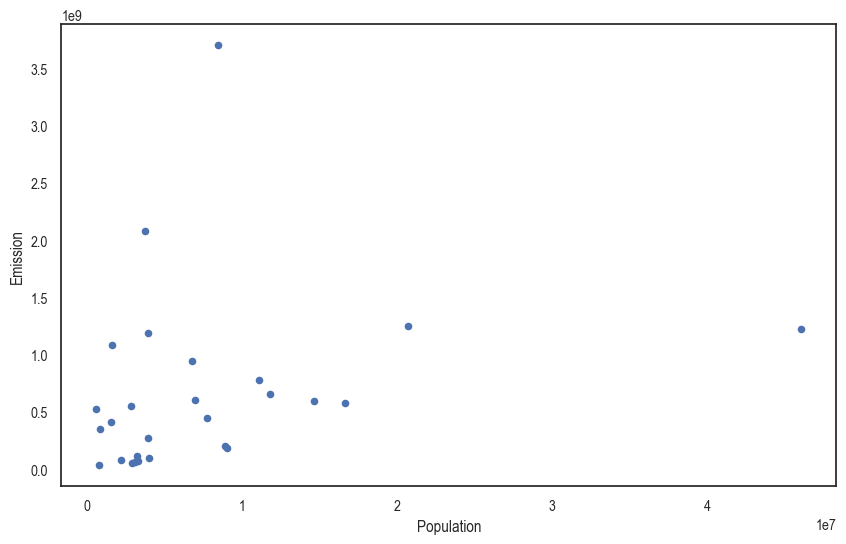

In [75]:
emission_per_capita.plot(kind = 'scatter', x = 'Population', y = 'Emission', figsize= (10,6));

In [76]:
import plotly.express as px

px.scatter(emission_per_capita, x= 'Population', y = 'Emission',  size = 'per_capita', text =emission_per_capita.index )

### Right now, we will create the barplot from States for Emission per capita

In [77]:
emission_per_capita.sort_values('per_capita', inplace = True)

In [78]:
px.bar(emission_per_capita, x = emission_per_capita.index, y = 'per_capita')